In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings

from scipy.optimize import minimize, rosen, rosen_der
from matplotlib.cm import inferno as colormap
from matplotlib.colors import LogNorm

from matplotlib.animation import FuncAnimation
import random
from mpl_toolkits.mplot3d import Axes3D, proj3d

from matplotlib import animation, rc
from IPython.display import HTML

warnings.filterwarnings('ignore')

<center>

# Parte 1: optimización numérica
</center>

## Descenso por gradiente

### Rosenbrock Function

Definida para _n_ dimensiones como:
$$
f(x_1,\ldots,x_N) =
\sum_{i=1}^{N-1} {[100(x_{i+1} + x_i²)² + (1 -  x_i²)²]}
$$

#### Dos dimensiones

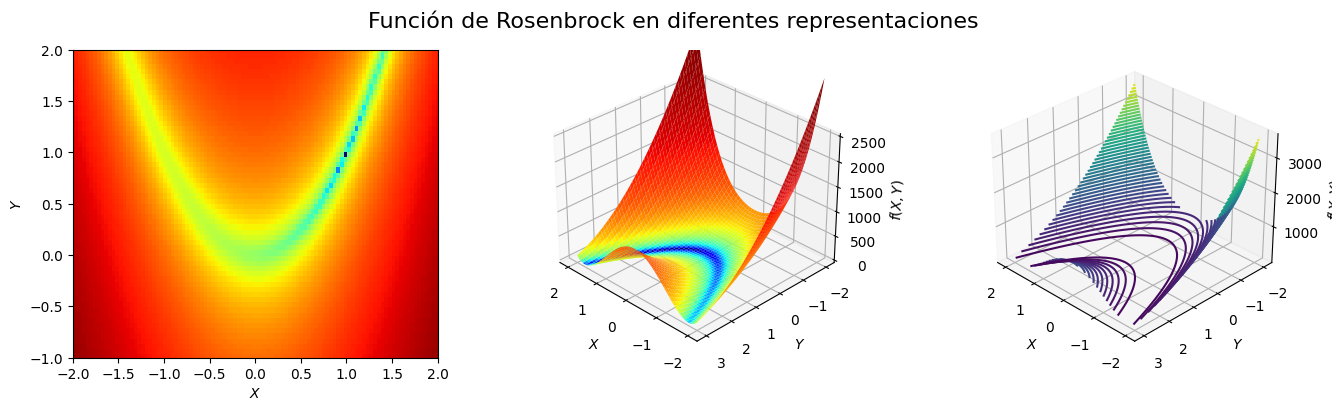

In [3]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = rosen([X1,X2])

fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

ax1.set_xlim([-2, 2])
ax1.set_ylim([-1, 2])
ax1.set_xlabel("$X$")
ax1.set_ylabel("$Y$")

ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$')
ax2.set_zlabel('$f(X,Y)$')
ax2.set_zlim([0, 2500])



ax3.set_xlabel('$X$')
ax3.set_ylabel('$Y$')
ax3.set_zlabel('$f(X,Y)$')


ax1.pcolormesh(X1, X2, Z, cmap='jet',norm=LogNorm())
#ax1.scatter(1, 1, color="k")
#ax1.annotate('Global Min', xy=(1, 1), xytext=(-0.5, 1.25),arrowprops=dict(facecolor='black', shrink=0.05))

# Surface plot
ax2.plot_surface(X1, X2, Z, norm = LogNorm(), cmap=matplotlib.cm.jet, linewidth=0)
ax2.view_init(elev=30, azim=135)  # Por ejemplo, elevación de 30 grados y azimut de 45 grados

#ax3.contour(X1, X2, Z, cmap=matplotlib.cm.jet, linewidth=0)
ax3.contour(X1, X2, Z,50)
ax3.view_init(elev=30, azim=135)  # Por ejemplo, elevación de 30 grados y azimut de 45 grados




# plt.savefig('rosenbrock.jpg')

plt.suptitle('Función de Rosenbrock en diferentes representaciones', fontsize=16)
plt.show()

##### Optimización

Vamos a proceder a optimizar la función dadas unas condiciones iniciales aleatorias

In [4]:
lsize = 2   #tamaño de la lista
n1 = 0      #limite izquierdo
n2 = 2      #limite derecho
ci = [round(random.uniform(n1, n2),2) for _ in range(lsize)]  #condiciones iniciales
res = minimize(rosen, ci, method='Nelder-Mead', tol=1e-6, options = {'disp':True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 83
         Function evaluations: 160


array([1.00000013, 1.00000025])

In [5]:
res = minimize(rosen, ci, method='BFGS', jac=rosen_der,
               options={'gtol': 1e-6, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 29
         Gradient evaluations: 29


array([1.        , 1.00000001])

Se observa que el algoritmo BFGS (Broyden-Fletcher-Goldfarb-Shanno) converge más rápidamente. Vamos a proceder con este haciendo uso del callback.

In [6]:
# Función para almacenar los resultados de cada iteración
def callback(xk):
    global iterations
    global sol

    #print(f"Iteration {iterations}: x = {xk}")
    sol.append(xk)
    iterations += 1


def rosen_opt(dim):
  global ci,iterations,sol,X1,X2,X3,Z

  # Punto inicial y contador de iteraciones
  n1 = -2      #limite izquierdo
  n2 = 2      #limite derecho
  iterations = 0
  sol = []

  if dim == 2:
    ci = [random.uniform(n1, n2) for _ in range(dim)]  #condiciones iniciales
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = rosen([X1,X2])


  elif dim ==3:
    li = -2
    ls = 2
    num = random.uniform(li,ls)

    ci = [random.uniform(n1, n2) for _ in range(dim-1)]  #condiciones iniciales
    ci.append(num)
    print(f"X3 = {round(num,2)}")
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    x3 = [num] * x2.shape[0]
    X1, X2, X3 = np.meshgrid(x1, x2, x3)
    Z = rosen([X1,X2,X3])



  print(f"Condiciones iniciales: {[round(num, 2) for num in ci]}\n\n")

  # Optimización con callback
  res = minimize(rosen, ci, method='BFGS', jac=rosen_der, options={'gtol': 1e-6, 'disp': False}, callback=callback)
  # Resultado final

  print("\nFinal result:")
  print(f"Resultado: {res.x}, Iterations: {iterations}")
  return res


Condiciones iniciales: [0.81, 1.78]



Final result:
Resultado: [1.00000011 1.00000023], Iterations: 17


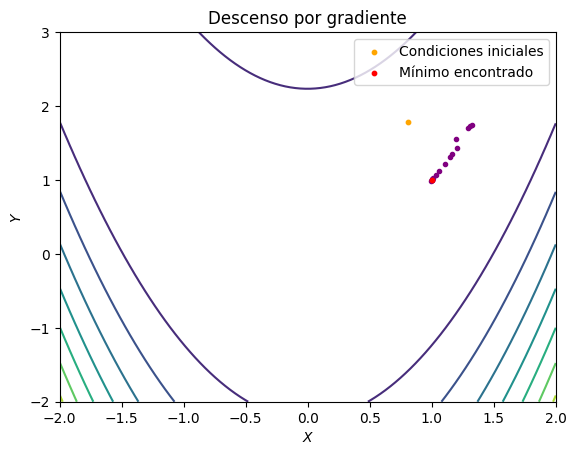

In [7]:
result = rosen_opt(2)


fig , ax = plt.subplots()
ax.contour(X1,X2,Z)

for k in range(iterations):
  plt.plot(sol[k][0],sol[k][1],'.',color = 'purple',zorder = 1)

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
#ax.annotate('Global Min', xy=(result.x[0], result.x[1]), xytext=(-0.5, 1.25),arrowprops=dict(facecolor='black', shrink=0.05))
ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder = 2)
ax.scatter(result.x[0], result.x[1], color='red', s=10, label='Mínimo encontrado', zorder = 2)
ax.set_title("Descenso por gradiente")

plt.legend()
plt.show()


###### Animación

In [8]:
sol = np.asarray(sol)

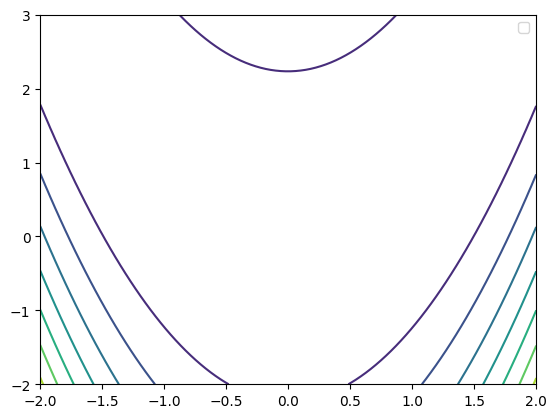

In [9]:
# Configurar la figura y el gráfico de contorno
fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z)
scatter = ax.scatter([], [])
plt.legend()

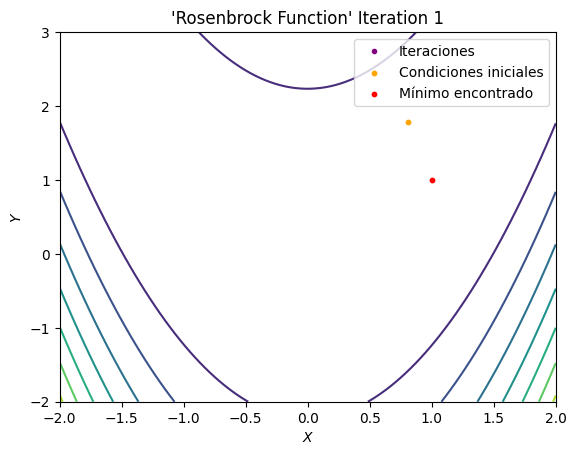

In [10]:
# Función para actualizar el gráfico
def update_plot(k):
    ax.clear()
    ax.contour(X1, X2, Z)
    ax.plot(sol[:k, 0], sol[:k, 1], '.', color='purple', zorder=1, label='Iteraciones')
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_title("'Rosenbrock Function' Iteration " + str(k+1))
    ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder=2)
    ax.scatter(sol[-1, 0], sol[-1, 1], color='red', s=10, label='Mínimo encontrado', zorder=2)
    ax.legend()

# Configuración inicial del gráfico
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update_plot,frames=len(sol)+1, interval=500, repeat=False)
ani.save('Rosenbrock_grad_descent.gif', writer='ffmpeg')


#### Tres dimensiones

##### Optimización

Podemos usar nuestra optimización para 3 dimensiones

In [11]:
result = rosen_opt(3)

X3 = -1.37
Condiciones iniciales: [1.2, -1.75, -1.37]



Final result:
Resultado: [0.99999999 0.99999998 0.99999996], Iterations: 41


Para poder observar graficamente debemos fijar la tercera entrada y graficar. Se toma la entrada $X_3$ como una constante aleatoria entre un rango.

X3 = 0.18
Condiciones iniciales: [1.94, 0.67, 0.18]



Final result:
Resultado: [1. 1. 1.], Iterations: 22


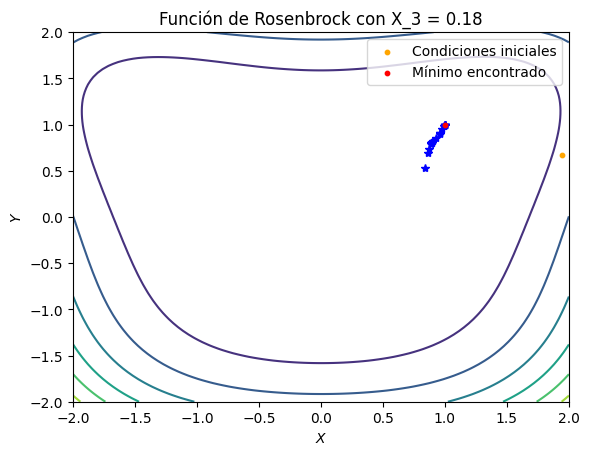

In [12]:
result = rosen_opt(3)


fig , ax = plt.subplots()
ax.contour(X1[:,:,0], X2[:,:,0], Z[:,:,0])

for k in range(iterations):
  plt.plot(sol[k][0],sol[k][1],'*b')

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_title(f'Función de Rosenbrock con X_3 = {round(ci[2],2)}')
# ax.annotate('Global Min', xy=(result.x[0], result.x[1]), xytext=(-0.5, 1.25),arrowprops=dict(facecolor='black', shrink=0.05))
ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder = 2)
ax.scatter(result.x[0], result.x[1], color='red', s=10, label='Mínimo encontrado', zorder = 2)



plt.legend()
plt.show()

###### Animación

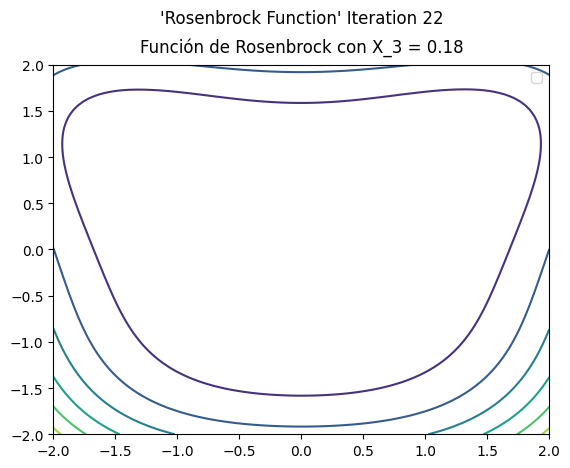

In [13]:
# Configurar la figura y el gráfico de contorno
fig, ax = plt.subplots()
ax.contour(X1[:,:,0], X2[:,:,0], Z[:,:,0])
scatter = ax.scatter([], [])
ax.set_title("'Rosenbrock Function' Iteration " + str(k+1),pad=30)
ax.text(0.5, 1.05, f'Función de Rosenbrock con X_3 = {round(ci[2],2)}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

# ax.set_subtitle(f'Función de Rosenbrock con X_3 = {round(ci[2],2)}')
plt.legend()

In [14]:
sol = np.asarray(sol)

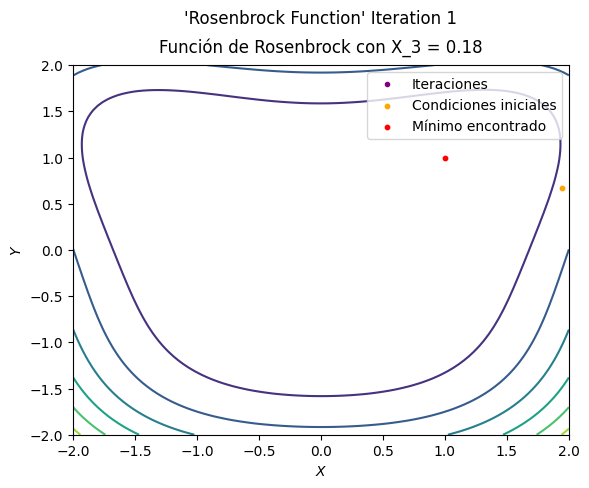

In [15]:
# Función para actualizar el gráfico
def update_plot(k):
  ax.clear()
  ax.contour(X1[:,:,0], X2[:,:,0], Z[:,:,0])
  ax.plot(sol[:k, 0], sol[:k, 1], '.', color='purple', zorder=1, label='Iteraciones')
  ax.set_xlabel('$X$')
  ax.set_ylabel('$Y$')
  ax.set_title("'Rosenbrock Function' Iteration " + str(k+1),pad=30)
  ax.text(0.5, 1.05, f'Función de Rosenbrock con X_3 = {round(ci[2],2)}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
  ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder=2)
  ax.scatter(sol[-1, 0], sol[-1, 1], color='red', s=10, label='Mínimo encontrado', zorder=2)
  ax.legend()

# Configuración inicial del gráfico
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update_plot,frames=len(sol)+1, interval=500, repeat=False)
ani.save('Rosenbrock_3d_grad_descent.gif', writer='ffmpeg')


****
### Six-Hump camel Function




La función *Six hump camel* se define para __2__ dimensiones como:

$$
f(x_1, x_2) = (4 - 2.1x_1^2 + \frac{x_1^4}{3})x_1^2 + x_1 x_2 + (-4 + 4x_2^2)x_2^2
$$

In [16]:
def six_hump(x):
  x = np.asarray(x)
  return (4 - 2.1 * x[0]**2 + (x[0]**4) / 3) * x[0]**2 + x[0] * x[1] + (-4 + 4 * x[1]**2) * x[1]**2

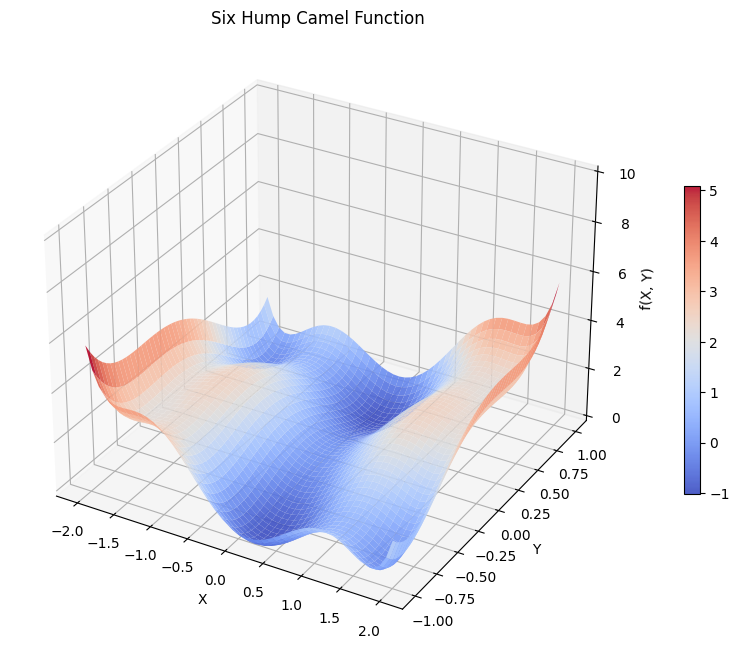

In [17]:
x1 = np.linspace(-2,2)
x2 = np.linspace(-1,1)
X1,X2 = np.meshgrid(x1, x2)
F = six_hump([X1,X2])

fig = plt.figure(figsize=[15,8])
ax = plt.axes(projection='3d')


ax.set_xlabel ('X')
ax.set_ylabel ('Y')
ax.set_zlabel ('f(X, Y)')
ax.set_title('Six Hump Camel Function')
ax.set_zlim([0, 10])
ax.zaxis.set_tick_params(pad=5)  # Ajusta la distancia del label del eje z al eje z




#ax.plot_wireframe(X1,X2,F,alpha=1,rcount=15,ccount=15)
surf = ax.plot_surface(X1,X2,F,cmap= 'coolwarm',alpha=0.9)
fig.colorbar(surf, shrink=0.5, aspect=20)

# plt.legend()
plt.show()

#### Optimización

In [111]:
def six_hump_opt(dim):
  global ci,iterations,sol,X1,X2,X3,Z

  # Punto inicial y contador de iteraciones
  n1 = -2      #limite izquierdo
  n2 = 2      #limite derecho
  iterations = 0
  sol = []

  if dim == 2:
    ci = [random.uniform(n1, n2) for _ in range(dim)]  #condiciones iniciales
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = six_hump([X1,X2])


  elif dim ==3:
    li = -2
    ls = 2
    num = random.uniform(li,ls)

    ci = [random.uniform(n1, n2) for _ in range(dim-1)]  #condiciones iniciales
    ci.append(num)
    print(f"X3 = {round(num,2)}")
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    x3 = [num] * x2.shape[0]
    X1, X2, X3 = np.meshgrid(x1, x2, x3)
    Z = six_hump([X1,X2,X3])



  print(f"Condiciones iniciales: {[round(num, 2) for num in ci]}\n\n")

  # Optimización con callback
  res = minimize(six_hump, ci, method='BFGS', options={'gtol': 1e-6, 'disp': False}, callback=callback)
  # Resultado final

  print("\nFinal result:")
  print(f"Resultado: {res.x}, Iterations: {iterations}")
  return res


Condiciones iniciales: [-0.86, -1.7]



Final result:
Resultado: [ 0.08984201 -0.71265641], Iterations: 11


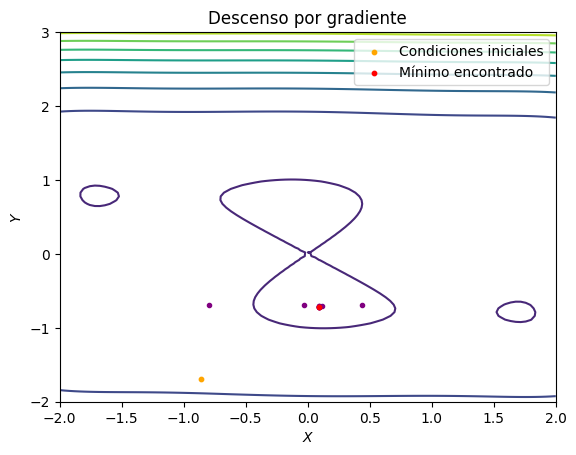

In [112]:
result = six_hump_opt(2)


fig , ax = plt.subplots()
ax.contour(X1,X2,Z)

for k in range(iterations):
  plt.plot(sol[k][0],sol[k][1],'.',color = 'purple',zorder = 1)

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_title("Descenso por gradiente")
#ax.annotate('Global Min', xy=(result.x[0], result.x[1]), xytext=(-0.5, 1.25),arrowprops=dict(facecolor='black', shrink=0.05))
ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder = 2)
ax.scatter(result.x[0], result.x[1], color='red', s=10, label='Mínimo encontrado', zorder = 2)

plt.legend()
plt.show()

##### Animación

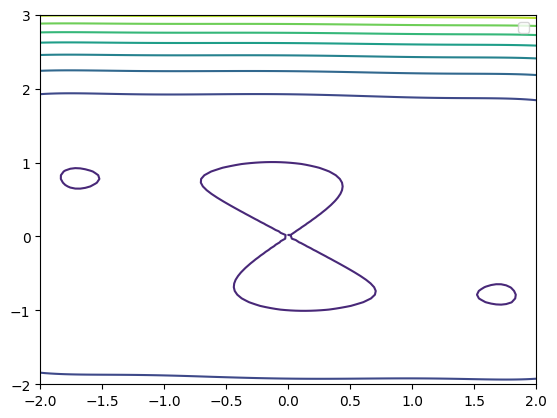

In [113]:
# Configurar la figura y el gráfico de contorno
fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z)
scatter = ax.scatter([], [])
plt.legend()

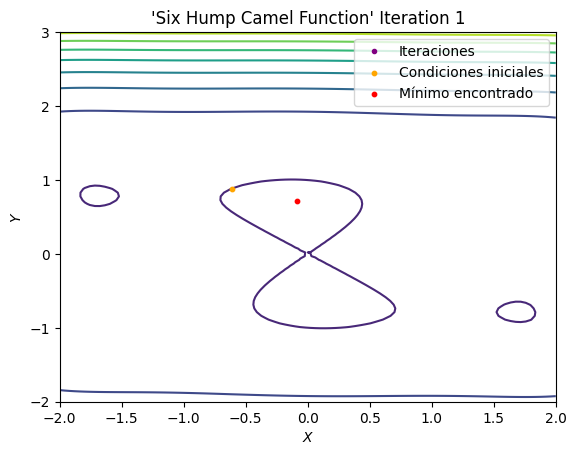

In [89]:
sol = np.asarray(sol)
# Función para actualizar el gráfico
def update_plot(k):
  ax.clear()
  ax.contour(X1, X2, Z)
  ax.plot(sol[:k, 0], sol[:k, 1], '.', color='purple', zorder=1, label='Iteraciones')
  ax.set_xlabel('$X$')
  ax.set_ylabel('$Y$')
  ax.set_title("'Six Hump Camel Function' Iteration " + str(k+1))
  ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder=2)
  ax.scatter(sol[-1, 0], sol[-1, 1], color='red', s=10, label='Mínimo encontrado', zorder=2)
  ax.legend()

# Configuración inicial del gráfico
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update_plot,frames=len(sol)+1, interval=500, repeat=False)
ani.save('SixHump_grad_descent.gif', writer='ffmpeg')


## Algoritmos Evolutivos

___

In [22]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.8 MB/s eta 0:00:00


In [23]:
import pygad

In [78]:
def mi_f_fitness(ga_instance,solution,solution_idx):
  y = -rosen(solution)
  #print(solution)
  return(y)

In [79]:
fitness_function = mi_f_fitness

num_generations = 50
num_parents_mating = 2

sol_per_pop = 20
num_genes = 2

init_range_low = -10.0
init_range_high = 10.0

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [80]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -1.0, 'high': 1.0},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

In [81]:
ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución : {solution}".format(solution=solution))
print("Valor de la función objetivo = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Posición de la mejor solución = {solution_idx}".format(solution_idx=solution_idx))

Mejor solución : [0.9470776 0.9006921]
Valor de la función objetivo = -0.0041966359927314385
Posición de la mejor solución = 0


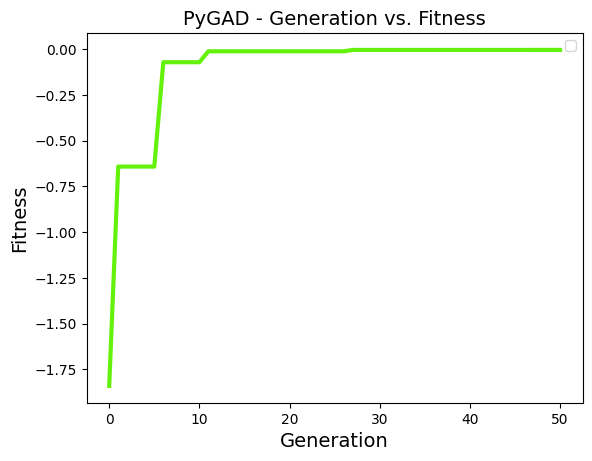

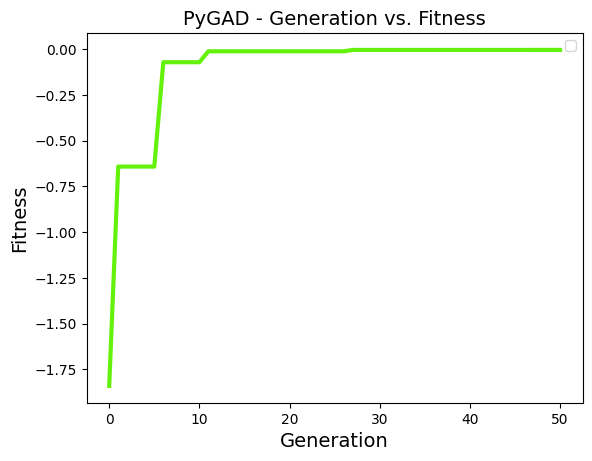

In [82]:
ga_instance.plot_fitness()

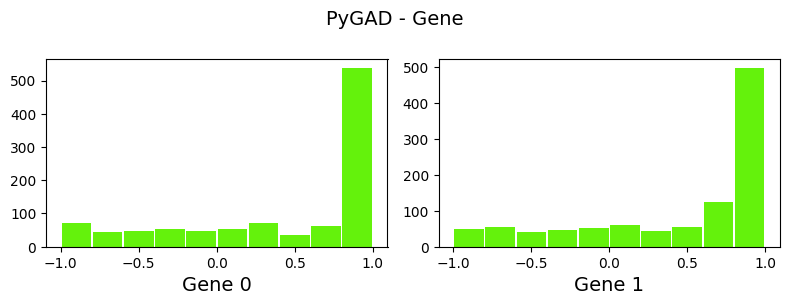

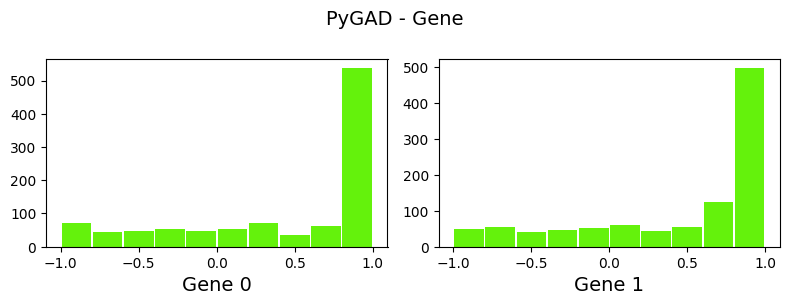

In [90]:
ga_instance.plot_genes(graph_type='histogram')

In [91]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = rosen([X1,X2])

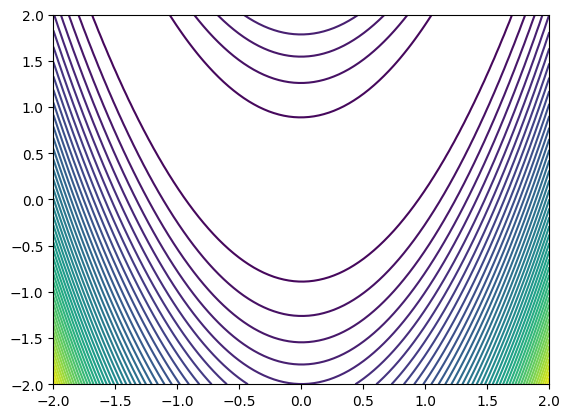

In [92]:
fig, ax = plt.subplots()

ax.set_xlim(( -2, 2))
ax.set_ylim((-2, 2))
ax.contour(X1,X2,Z, levels = 50)
scatter, = ax.plot([], [], '*')

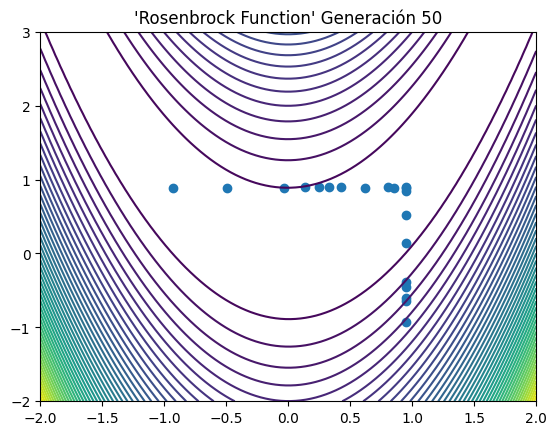

In [93]:
# Configurar la figura y el gráfico de contorno
fig, ax = plt.subplots()
contour = ax.contour(X1,X2,Z, levels = 50)
scatter = ax.scatter([], [])

# Función de actualización para la animación
def update(j):
    Pob = np.array(ga_instance.solutions[j*sol_per_pop:(j+1)*sol_per_pop])
    scatter.set_offsets(Pob)
    ax.set_title("'Rosenbrock Function' Generación " + str(j))
    return scatter,

# Configuración para la animación
ani = FuncAnimation(fig, update, frames=range(num_generations+1), interval=0.5, blit=True)

# Mostrar la animación
ani.save('Rosen_pygad.gif', writer='ffmpeg')


# plt.show()

In [103]:
def mi_f_fitness(ga_instance,solution,solution_idx):
  y = -six_hump(solution)
  #print(solution)
  return(y)

In [104]:
fitness_function = mi_f_fitness

num_generations = 20
num_parents_mating = 2

sol_per_pop = 20
num_genes = 2

init_range_low = -10.0
init_range_high = 10.0

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [105]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -1.0, 'high': 1.0},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

In [106]:
ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución : {solution}".format(solution=solution))
print("Valor de la función objetivo = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Posición de la mejor solución = {solution_idx}".format(solution_idx=solution_idx))

Mejor solución : [-0.08098574  0.67937394]
Valor de la función objetivo = 1.0229611484033314
Posición de la mejor solución = 0


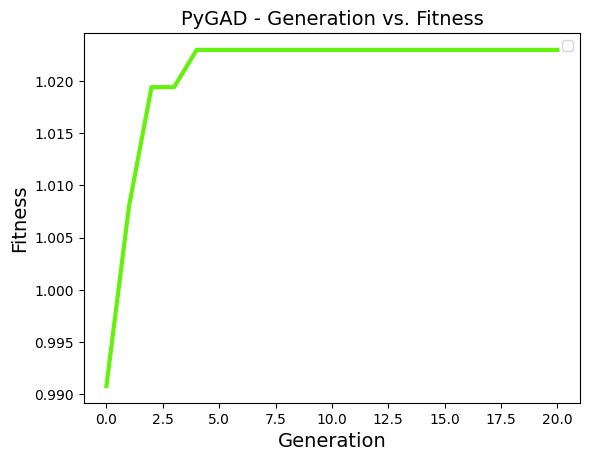

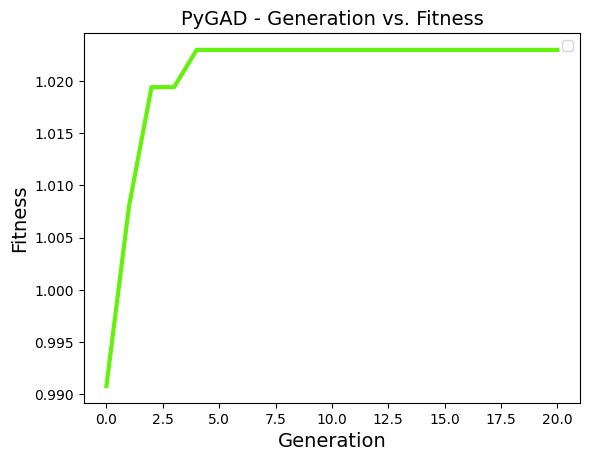

In [107]:
ga_instance.plot_fitness()

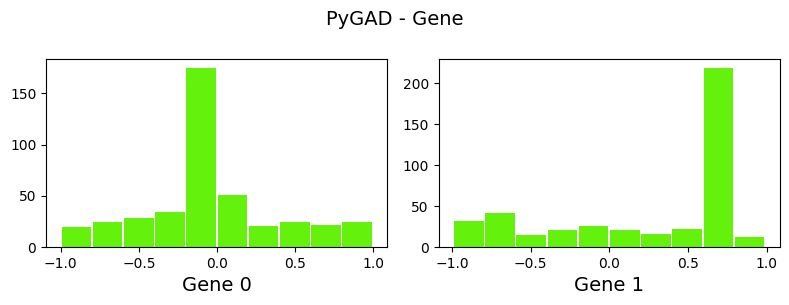

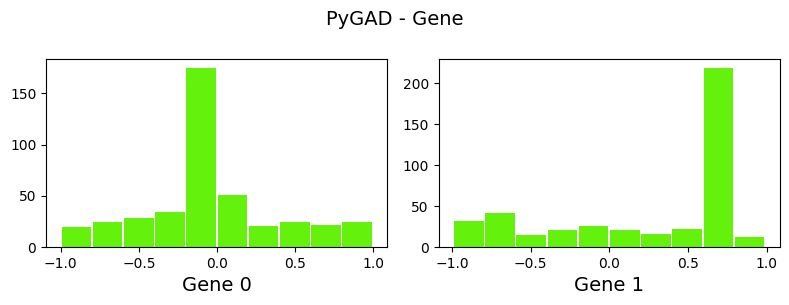

In [108]:
ga_instance.plot_genes(graph_type='histogram')

In [115]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = six_hump([X1,X2])

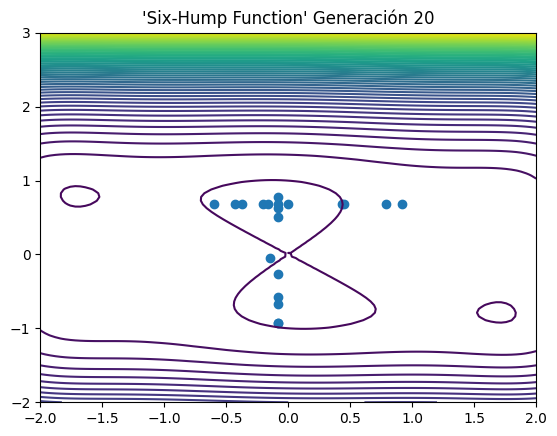

In [116]:
# Configurar la figura y el gráfico de contorno
fig, ax = plt.subplots()
contour = ax.contour(X1,X2,Z, levels = 50)
scatter = ax.scatter([], [])

# Función de actualización para la animación
def update(j):
    Pob = np.array(ga_instance.solutions[j*sol_per_pop:(j+1)*sol_per_pop])
    scatter.set_offsets(Pob)
    ax.set_title("'Six-Hump Function' Generación " + str(j))
    return scatter,

# Configuración para la animación
ani = FuncAnimation(fig, update, frames=range(num_generations+1), interval=0.5, blit=True)

# Mostrar la animación
ani.save('SixHump_pygad.gif', writer='ffmpeg')


# plt.show()

## Particle Swarm Optimization

In [120]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.6 MB/s eta 0:00:00


In [121]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

In [122]:
import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import imageio

In [156]:
def f(x):
    x_ = x[:, 0]
    y_ = x[:, 1]
    return ((4 - 2.1 * x_ ** 2 + x_ ** 4 / 3.) * x_ ** 2 + x_ * y_
            + (-4 + 4 * y_ ** 2) * y_ ** 2)


options = {'c1': 0.5, 'c2': 1.5, 'w': 0.5}
bounds = np.array([[-2, 2], [2, 1]])   # Add x limit (-2, 2) and y limit (-1, 1)
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, bounds=bounds, options=options)
best_cost, best_pos = optimizer.optimize(f, iters=100)
best_pos = np.round(best_pos, 2)        # Round to 2 decimals
print("Best position: ", best_pos)

2024-03-13 05:18:59,748 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-1.03
2024-03-13 05:19:00,023 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.0316284534898774, best pos: [-0.08984201  0.7126564 ]


Best position:  [-0.09  0.71]


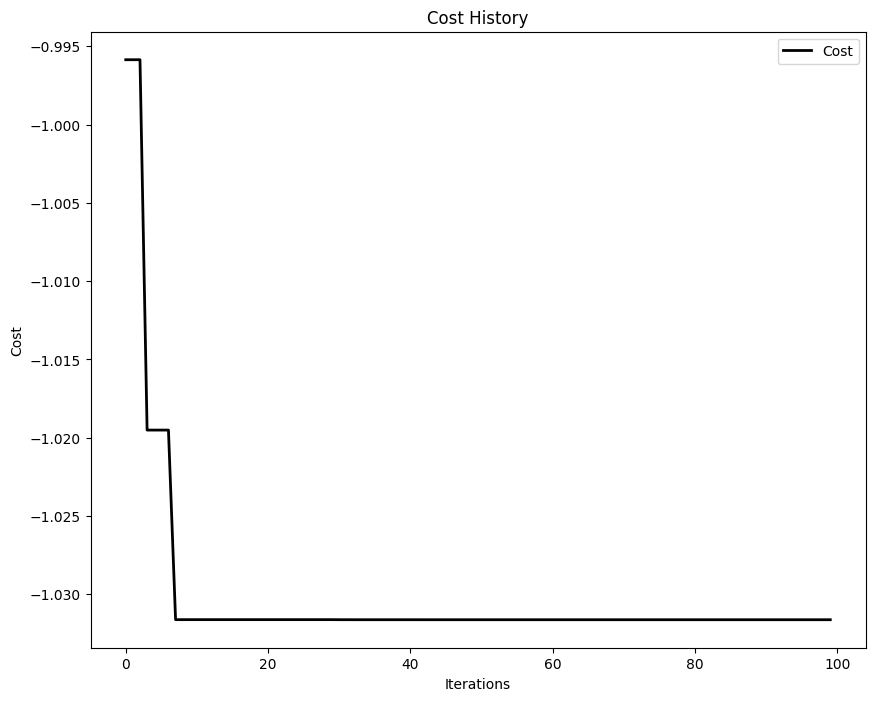

In [136]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [132]:
# equivalent to rcParams['animation.html'] = 'html5'
# See http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/
rc('animation', html='html5')

In [133]:
from pyswarms.utils.plotters.formatters import Mesher
# Initialize mesher with sphere function
m = Mesher(func=fx.sphere)

In [157]:
%%capture

# Make and save animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

# Enables us to view it in a Jupyter notebook
animation.save('PSO_sixhump.gif', writer='imagemagick', fps=20)


2024-03-13 05:19:07,065 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-03-13 05:19:07,074 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


In [158]:
# import modules
import numpy as np

# create a parameterized version of the classic Rosenbrock unconstrained optimzation function
def rosenbrock_with_args(x, a, b, c=0):
    f = (a - x[:, 0]) ** 2 + b * (x[:, 1] - x[:, 0] ** 2) ** 2 + c
    return f

array([-10., -10.])

In [175]:
from pyswarms.single.global_best import GlobalBestPSO

# instatiate the optimizer
x_max = 10 * np.ones(2)
x_min = -1 * x_max
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.7}
bounds = (x_min, x_max)
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)

# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(rosenbrock_with_args, 50, a=1, b=100, c=0)

2024-03-13 05:38:40,067 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=0.00131
2024-03-13 05:38:40,285 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.001312697096169991, best pos: [1.03257423 1.06779579]


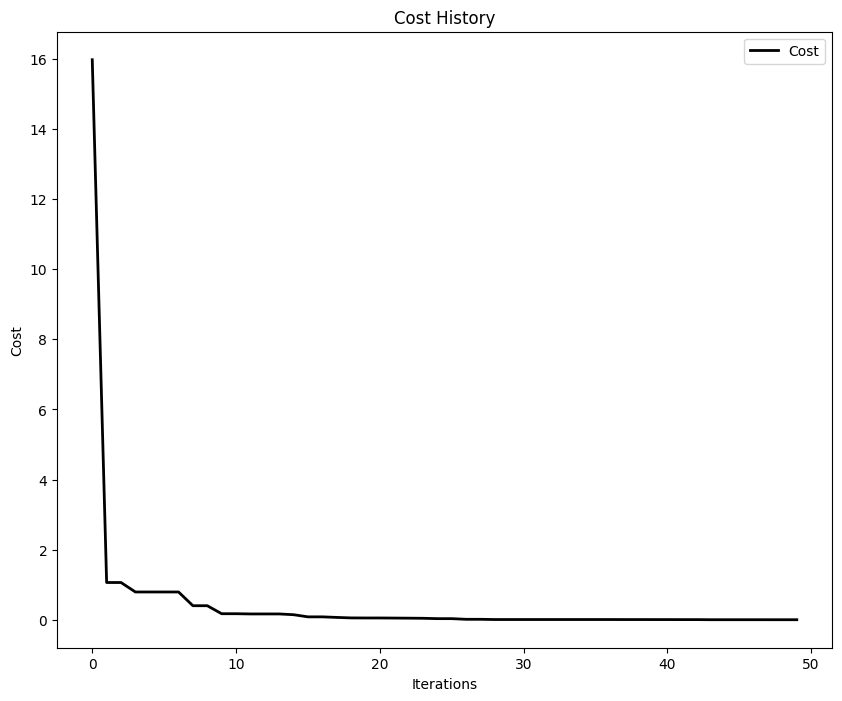

In [176]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [177]:
%%capture

# Make and save animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(1,1))
# Set xlim and ylim to enlarge the plot
plt.xlim(-3, 3)  # Adjust these values as needed
plt.ylim(-2, 2)  # Adjust these values as needed
# Enables us to view it in a Jupyter notebook
animation.save('rosen_PSO.gif', writer='imagemagick', fps=20)


2024-03-13 05:38:47,424 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2024-03-13 05:38:47,427 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
